In [1]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Reading the training features and labels

X = pd.read_csv("./dataset/training_features.csv")
y = pd.read_csv("./dataset/training_labels.csv")

print(X.shape)
print(y.shape)

(59400, 40)
(59400, 2)


In [3]:
# confirming that the labels and the features are in proper order
np.array_equal(X['id'].values, y['id'].values)

True

In [3]:
df = pd.concat([X, y], axis=1, ignore_index=False)

print(df.info())

# not sure why the correlation is not showing
print(df.corr()['status_group'].sort_values(ascending=False))

# describe will show all the data 
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 42 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

KeyError: 'status_group'

In [4]:
# checking the relationship of some of the features with the labels

basin_count = df.groupby(["basin", "status_group"]).size()
region_count = df.groupby(["region", "status_group"]).size()
quantity_count = df.groupby(["quantity", "status_group"]).size()
water_quality_count = df.groupby(["water_quality", "status_group"]).size()
print(basin_count) 
print(quantity_count)
print(water_quality_count)

basin                    status_group           
Internal                 functional                 4482
                         functional needs repair     557
                         non functional             2746
Lake Nyasa               functional                 3324
                         functional needs repair     250
                         non functional             1511
Lake Rukwa               functional                 1000
                         functional needs repair     270
                         non functional             1184
Lake Tanganyika          functional                 3107
                         functional needs repair     742
                         non functional             2583
Lake Victoria            functional                 5100
                         functional needs repair     989
                         non functional             4159
Pangani                  functional                 5372
                         functional nee

#### Data Preprocessing Method 2: Assign values based on the chance/probability for each data feature value to result into "functional" and "needs repair"

In [5]:
# I was more familiar with R so I also did some work in R to come up with the data_scheme for preprocessing method 2
data_scheme = pd.read_csv("./dataset/data_scheme.csv")

# this is the modified data (modified in R, because i couldn't manipulate data properly in python)
X_final = pd.read_csv("./dataset/X_final.csv") 

print(data_scheme.head())
print(data_scheme.tail())

  columnname        valuename  functional  needs_repair
0      basin         Internal    0.575723      0.110538
1      basin       Lake Nyasa    0.653687      0.069950
2      basin       Lake Rukwa    0.407498      0.212598
3      basin  Lake Tanganyika    0.483053      0.192777
4      basin    Lake Victoria    0.497658      0.162424
         columnname                    valuename  functional  needs_repair
81  waterpoint_type  communal standpipe multiple    0.366213      0.224766
82  waterpoint_type                          dam    0.857143      0.000000
83  waterpoint_type                    hand pump    0.617852      0.086953
84  waterpoint_type              improved spring    0.718112      0.131173
85  waterpoint_type                        other    0.131661      0.258605


In [6]:
y.loc[y['status_group'] == 'functional', 'label'] = '0'
y.loc[y['status_group'] == 'non functional', 'label'] = '2'
y.loc[y['status_group'] == 'functional needs repair', 'label'] = '1'

In [7]:
print(y.head())
y_final = y['label'].values
X_final = X_final.values
print(y_final)
np.unique(y_final)

      id    status_group label
0  69572      functional     0
1   8776      functional     0
2  34310      functional     0
3  67743  non functional     2
4  19728      functional     0
['0' '0' '0' ... '0' '0' '0']


array(['0', '1', '2'], dtype=object)

In [8]:
print(X_final.shape)
print(y_final.shape)

(59400, 21)
(59400,)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy

scaler = StandardScaler()

X_final_sc = copy.deepcopy(X_final)

# Fit on training set only.
scaler.fit(X_final)

# Apply transform to both the training set and the test set.
X_final_scaled = scaler.transform(X_final)

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.4, random_state=0)
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_final_scaled, y_final, test_size=0.4, random_state=0)

In [11]:
print(X_train)
print(X_train_sc)

[[5.23801570e-01 7.90014684e-02 5.28956565e-01 ... 1.00000000e+00
  2.01000000e+03 2.00000000e+00]
 [5.75722543e-01 1.10537805e-01 4.83038700e-01 ... 1.00000000e+00
  2.00000000e+03 1.00000000e+00]
 [6.35406219e-01 7.93823797e-02 5.90512334e-01 ... 1.00000000e+00
  2.00400000e+03 5.00000000e+00]
 ...
 [6.35406219e-01 7.93823797e-02 7.82206271e-01 ... 1.00000000e+00
  2.00300000e+03 1.00000000e+00]
 [6.35406219e-01 7.93823797e-02 7.82206271e-01 ... 1.00000000e+00
  1.99600000e+03 1.00000000e+00]
 [6.35406219e-01 7.93823797e-02 7.82206271e-01 ... 1.00000000e+00
  1.99900000e+03 1.00000000e+00]]
[[-0.23731969 -0.90039037 -0.12684766 ...  0.7316015   0.74541633
   0.11722958]
 [ 0.40180667 -0.23075149 -0.53922897 ...  0.7316015   0.73490785
  -0.67227574]
 [ 1.13648877 -0.89230214  0.42597526 ...  0.7316015   0.73911124
   2.48574552]
 ...
 [ 1.13648877 -0.89230214  2.14754913 ...  0.7316015   0.7380604
  -0.67227574]
 [ 1.13648877 -0.89230214  2.14754913 ...  0.7316015   0.73070446
  -0.6

In [12]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train_sc, y_train_sc)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_sc, y_train_sc)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_sc, y_test_sc)

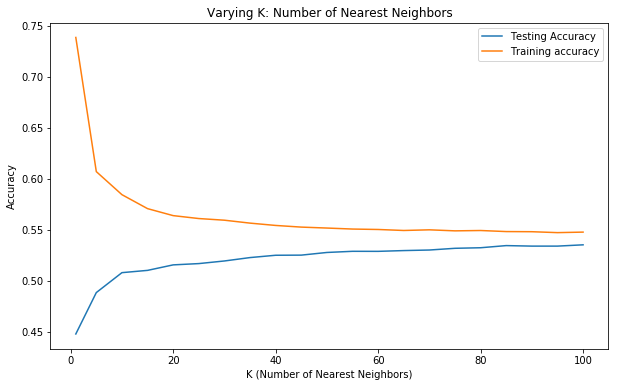

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
plt.title('Varying K: Number of Nearest Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('K (Number of Nearest Neighbors)')
plt.ylabel('Accuracy')
plt.show()

In [14]:
# Set the the range of K 
neighbors = [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

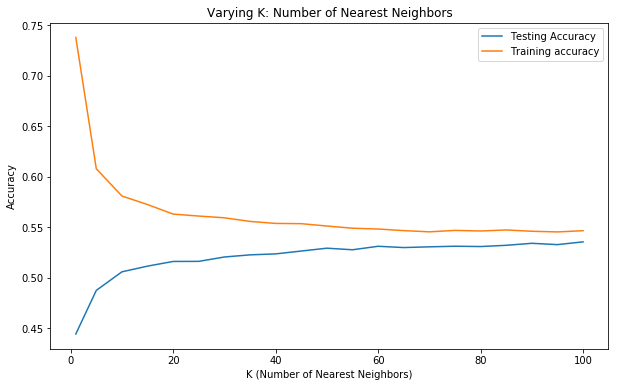

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
plt.title('Varying K: Number of Nearest Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('K (Number of Nearest Neighbors)')
plt.ylabel('Accuracy')
plt.show()

#### We also checked with Logistic Regression but it still gave low accuracy so we thought of changing our methodolody altogether, but there wasn't enough time, so we thought we'd best just explain the results we have. 

In [12]:
hot_cols = ['basin', 'region', 'scheme_management', 'extraction_type', 'permit', 'water_quality', 'quantity', 'source', 'waterpoint_type']
df_categorical = copy.deepcopy(df[hot_cols])
print(df_categorical.head())
df_categorical = pd.get_dummies(df_categorical)

df_categorical.shape

                     basin   region scheme_management extraction_type permit  \
0               Lake Nyasa   Iringa               VWC         gravity  False   
1            Lake Victoria     Mara             Other         gravity   True   
2                  Pangani  Manyara               VWC         gravity   True   
3  Ruvuma / Southern Coast   Mtwara               VWC     submersible   True   
4            Lake Victoria   Kagera               NaN         gravity   True   

  water_quality      quantity                source  \
0          soft        enough                spring   
1          soft  insufficient  rainwater harvesting   
2          soft        enough                   dam   
3          soft           dry           machine dbh   
4          soft      seasonal  rainwater harvesting   

               waterpoint_type  
0           communal standpipe  
1           communal standpipe  
2  communal standpipe multiple  
3  communal standpipe multiple  
4           communal st

(59400, 92)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_categorical, y_final, test_size=0.4, random_state=0)

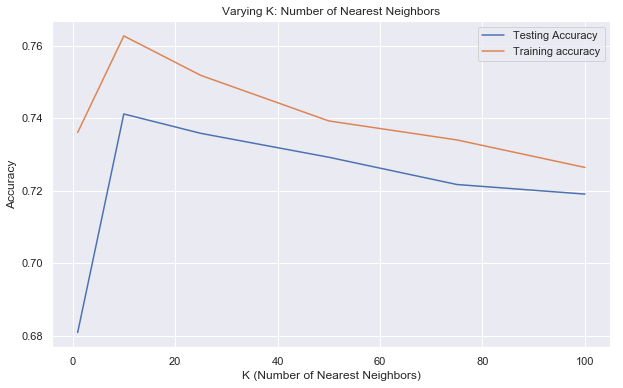

In [180]:
# Set the the range of K 
neighbors = [1, 10, 25, 50, 75, 100]

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
    
fig = plt.figure(figsize=(10, 6))
plt.title('Varying K: Number of Nearest Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('K (Number of Nearest Neighbors)')
plt.ylabel('Accuracy')
plt.show()   

In [181]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

print(knn.score(X_train, y_train))

print(knn.score(X_test, y_test))

0.7627665544332211
0.7412037037037037


#### Since the optimal values seems to lie somewhere between 5 - 10, lets run this again with lower numbers.

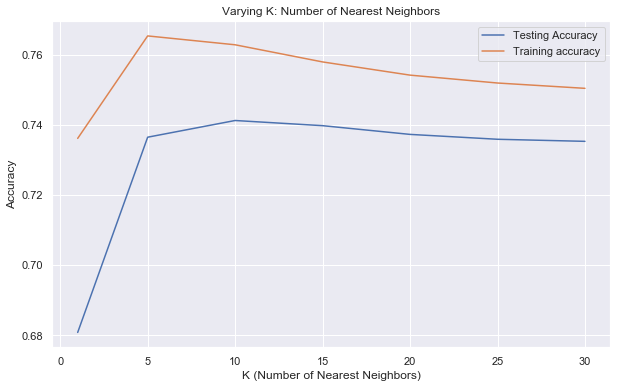

In [182]:
X_train, X_test, y_train, y_test = train_test_split(df_categorical, y_final, test_size=0.4, random_state=0)

# Set the the range of K 
neighbors = [1, 5, 10, 15, 20, 25, 30]

# Two arrays to store training and test accuracies
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # The "score" function returns the mean accuracy on the given train/test data and labels.
    # Note that "accuracy" may not be a good performance measure in a skewed data set
    # Thus, we need to do hyperparameter tuning by using better performance measures (e.g., f1 score, presision, recall)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
    
fig = plt.figure(figsize=(10, 6))
plt.title('Varying K: Number of Nearest Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('K (Number of Nearest Neighbors)')
plt.ylabel('Accuracy')
plt.show()   

#### Now lets add the weighted distance - same KNN model

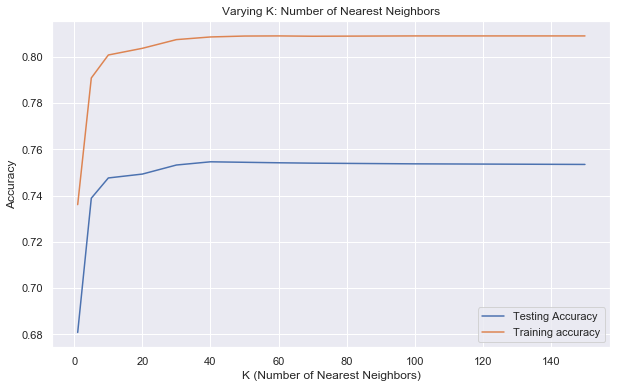

In [222]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(df_categorical, y_final, test_size=0.4, random_state=0)

# Set the the range of K 
neighbors = [1, 5, 10, 20, 30, 40, 50, 60, 70, 100, 150]

# Two arrays to store training and test accuracies
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # The "score" function returns the mean accuracy on the given train/test data and labels.
    # Note that "accuracy" may not be a good performance measure in a skewed data set
    # Thus, we need to do hyperparameter tuning by using better performance measures (e.g., f1 score, presision, recall)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
    
fig = plt.figure(figsize=(10, 6))
plt.title('Varying K: Number of Nearest Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('K (Number of Nearest Neighbors)')
plt.ylabel('Accuracy')
plt.show()   

In [224]:
print(neighbors)
print(train_accuracy)
print(test_accuracy)

[1, 5, 10, 20, 30, 40, 50, 60, 70, 100, 150]
[0.73611111 0.79088103 0.80081369 0.8037037  0.80746352 0.80861392
 0.80900673 0.80906285 0.80892256 0.80906285 0.80906285]
[0.68085017 0.73888889 0.7476431  0.7493266  0.75324074 0.75462963
 0.75441919 0.75420875 0.7540404  0.75374579 0.75349327]


#### Evaluation for the ran KNN 

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(weights="distance", algorithm='ball_tree', n_neighbors=60)
knn.fit(X_train, y_train)

scores = cross_val_score(knn, X_train, y_train, scoring='f1_micro', cv=3)
print(scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

# The accuracy of the model
score = knn.score(X_test, y_test)
print("Accuracy: %f" % score)

# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

precision_test = precision_score(y_test, y_test_predicted, average='micro') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted, average='micro')
print("Test Recall = %f" % recall_test)

f1_test = f1_score(y_test, y_test_predicted, average='micro')
print("Test F1 Score = %f" % f1_test)

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


[0.75380342 0.75530303 0.74802702]
Accuracy: 0.75 (+/- 0.01)
Accuracy: 0.760690

No. of correct predictions (Test): 9037/11880

Test Confusion Matrix:
[[5782   96  579]
 [ 550  159  142]
 [1397   79 3096]]

Test Precision = 0.760690
Test Recall = 0.760690
Test F1 Score = 0.760690

Classification Report:
             precision    recall  f1-score   support

          0       0.75      0.90      0.82      6457
          1       0.48      0.19      0.27       851
          2       0.81      0.68      0.74      4572

avg / total       0.75      0.76      0.75     11880



### Random Forest

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_categorical, y_final, test_size=0.2, random_state=42)

In [32]:
%%time

param_grid = {'n_estimators': [1, 10, 50, 100, 200],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [1, 4, 8, 16, 32],
              'min_samples_split': [0.1, 0.4, 0.8, 1.0],
              'min_samples_leaf': [0.1, 0.3, 0.5]}

clf = RandomForestClassifier()

clf_cv = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5)
clf_cv.fit(X_train, y_train)

params_optimal = clf_cv.best_params_

print("Best Score (accuracy): %f" % clf_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)
print("\n")

Best Score (accuracy): 0.579461
Optimal Hyperparameter Values:  {'max_depth': 32, 'max_features': 'auto', 'min_samples_leaf': 0.1, 'min_samples_split': 0.4, 'n_estimators': 1}


CPU times: user 1h 15min 15s, sys: 1min, total: 1h 16min 15s
Wall time: 39min 41s


In [41]:
# clf = RandomForestClassifier(**params_optimal)
clf = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=42, max_features='auto', 
                            min_samples_leaf=0.5, min_samples_split=0.5)
clf.fit(X_train, y_train)
print(clf.feature_importances_)
y_test_pred = clf.predict(X_test)
print("Training Accuracy: ", clf.score(X_train, y_train))
print("Test Accuracy: ", clf.score(X_test, y_test))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

precision_test = precision_score(y_test, y_test_pred, average='micro') 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_pred, average='micro')
print("Test Recall = %f" % recall_test)

f1_test = f1_score(y_test, y_test_pred, average='micro')
print("Test F1 Score = %f" % f1_test)

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Training Accuracy:  0.5429713804713805
Test Accuracy:  0.5435185185185185

Test Confusion Matrix:
[[6457    0    0]
 [ 851    0    0]
 [4572    0    0]]

Test Precision = 0.543519
Test Recall = 0.543519
Test F1 Score = 0.543519

Classification Report:
             precision    recall  f1-score   support

          0       0.54      1.00      0.70      6457
          1       0.00      0.00      0.00       851
          2       0.00      0.00      0.00      4572

avg / total       0.30      0.54      0.38     11880



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Logistic Regression - OvA

In [227]:
%%time
param_grid = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
              'multi_class' : ['ovr'],
              'tol': [1e-3, 1e-4], 'max_iter':[5000, 10000],'C': [10, 50]}

lg_reg = LogisticRegression()

lg_reg_cv = GridSearchCV(lg_reg, param_grid, scoring='accuracy', cv=3)
lg_reg_cv.fit(X_train, y_train)

params_optimal = lg_reg_cv.best_params_

print("Best Score (accuracy): %f" % lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal)

lg_reg_clf = LogisticRegression(**params_optimal)

lg_reg_clf.fit(X_train, y_train)

print("No. of Iterations:",lg_reg_clf.n_iter_ )

y_test_predicted = lg_reg_clf.predict(X_test)
#print(y_test_predict)

accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nAccuracy: ", accuracy_score_test)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

Best Score (accuracy): 0.716723
Optimal Hyperparameter Values:  {'C': 10, 'max_iter': 5000, 'multi_class': 'ovr', 'solver': 'sag', 'tol': 0.0001}
No. of Iterations: [ 83 167  66]

Accuracy:  0.7136784511784512

Test Confusion Matrix:
[[11570     5  1266]
 [ 1414    19   313]
 [ 3795    10  5368]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.90      0.78     12841
           1       0.56      0.01      0.02      1746
           2       0.77      0.59      0.67      9173

   micro avg       0.71      0.71      0.71     23760
   macro avg       0.67      0.50      0.49     23760
weighted avg       0.71      0.71      0.68     23760

Wall time: 13min 12s


In [228]:
%%time
param_grid_sm = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 
              'multi_class' : ['multinomial'],
              'tol': [1e-3, 1e-4, 1e-5], 'max_iter':[5000, 10000],'C': [10, 50]}

lg_reg_sm = LogisticRegression()

lg_reg_sm_cv = GridSearchCV(lg_reg_sm, param_grid_sm, scoring='accuracy', cv=3)
lg_reg_sm_cv.fit(X_train, y_train)

params_optimal_sm = lg_reg_sm_cv.best_params_

print("Best Score (accuracy): %f" % lg_reg_sm_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_sm)

softmax_reg = LogisticRegression(**params_optimal_sm)

softmax_reg.fit(X_train, y_train)

print("No. of Iterations:", softmax_reg.n_iter_ )

y_test_predicted = softmax_reg.predict(X_test)
#print(y_test_predict)

accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nAccuracy: ", accuracy_score_test)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))

c:\program files\python37\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\program files\python37\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Best Score (accuracy): 0.717873
Optimal Hyperparameter Values:  {'C': 10, 'max_iter': 5000, 'multi_class': 'multinomial', 'solver': 'newton-cg', 'tol': 0.001}
No. of Iterations: [20]

Accuracy:  0.7138468013468013

Test Confusion Matrix:
[[11574    23  1244]
 [ 1423    26   297]
 [ 3795    17  5361]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.90      0.78     12841
           1       0.39      0.01      0.03      1746
           2       0.78      0.58      0.67      9173

   micro avg       0.71      0.71      0.71     23760
   macro avg       0.62      0.50      0.49     23760
weighted avg       0.70      0.71      0.68     23760

Wall time: 2h 47min 57s
